<a href="https://colab.research.google.com/github/Cheekala1234/Projects-ML-DL/blob/main/Performance_Analysis_of_Classification_Algorithms_on_data_science_salaries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement:**Analysing the performance of classification algorithms on Data Science Salaries dataset to categories the company size with best accuract score**

# **Performance Analysis of Classification**

**Initially importing packages**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('ggplot')

**importing and reading DS Salaries dataset**





In [ ]:
data = pd.read_csv('ds_salaries.csv')

**Displaying first 5 rows present in the dataset**


In [ ]:
data.head(10)

,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,6,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,7,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,8,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,9,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,10,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


**Displaying first 5 rows present in the dataset**


In [ ]:
data.tail(10)

,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,598,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
598,599,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,600,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
600,601,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,602,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
602,603,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,604,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,605,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,606,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,607,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


**By using describe() method we can computes and displays summary statistics in the dataset**

In [ ]:
data.describe()

,S.No.,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,304.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,1.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,152.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,304.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,455.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,607.000000,2022.000000,3.040000e+07,600000.000000,100.00000


**info() method gives the information about size of the dataset and the count of null values**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   S.No.               607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Finding null values**

In [ ]:
data.isnull().sum()

S.No.                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**Dropping null values from the dataset**

**No null values are present in DS Salaries dataset so , here i am getting same shape after droping null values**

In [ ]:
dropped_columns = data.dropna(axis = 1)
print("the original number of columns was",data.shape[1])
print("the data frame after dropping NaN is",dropped_columns.shape[1])
dropped_columns.head()

the original number of columns was 12
the data frame after dropping NaN is 12


,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**filling the null values using bfill method**

In [ ]:
data.fillna(method = 'bfill')

,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,603,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,604,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,605,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,606,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [ ]:
data.fillna(method = 'bfill', axis = 0).fillna(0)

,S.No.,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,603,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,604,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,605,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,606,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# **Exploratory Data Analysis**

**Boxplot**

**plotting boxplot to know the outliers present in the salary**

Text(0.5, 1.0, 'Boxplot for salary')

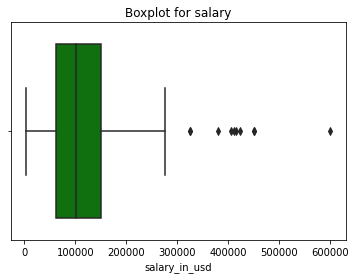

In [ ]:
sns.boxplot(data['salary_in_usd'],color="green")
plt.title("Boxplot for salary")

**salsary greater than 200000**

In [ ]:
print(np.where(data['salary_in_usd']>200000))

(array([  1,  25,  33,  37,  63,  74,  78,  93,  97, 115, 138, 141, 157,
       160, 167, 173, 224, 225, 231, 252, 309, 321, 337, 342, 357, 378,
       398, 400, 416, 421, 444, 446, 472, 477, 482, 483, 484, 486, 519,
       523, 532, 534, 535, 542, 550, 554, 558, 560, 570, 574, 576, 582,
       592, 596]),)


**Removing outliers present in salary_in_usd**

In [ ]:
Q1 = np.percentile(data['salary_in_usd'], 25,
interpolation = 'midpoint')
Q3 = np.percentile(data['salary_in_usd'], 75,
interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)
# Upper bound
upper = np.where(data['salary_in_usd'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['salary_in_usd'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (607, 12)
New Shape:  (597, 12)


**Bar chart**

**Bar chart with type and tire**

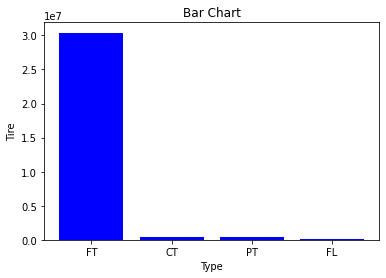

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# reading the database
data = pd.read_csv("ds_salaries.csv")
# Bar chart with type and tire
plt.bar(data['employment_type'], data['salary'],color="blue")
plt.title("Bar Chart")
# Setting the X and Y labels
plt.xlabel('Type')
plt.ylabel('Tire')
#Showing the bar graph
plt.show()

**Histogram**

**Histogram of salary_in_usd**

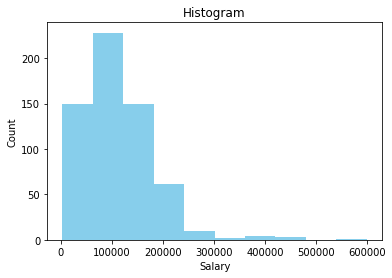

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# reading the database
data = pd.read_csv("ds_salaries.csv")
# histogram of Salary_in_usd
plt.hist(data['salary_in_usd'],color="skyblue")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Histogram")
plt.show()

**Histogram of company size**

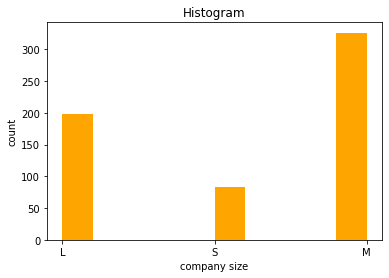

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# reading the database
data = pd.read_csv("ds_salaries.csv")
# histogram of company size
plt.hist(data['company_size'],color="orange")
plt.title("Histogram")
plt.xlabel('company size')
plt.ylabel('count')
plt.show()

**Density plot**

**Density plot for salary_in_usd**

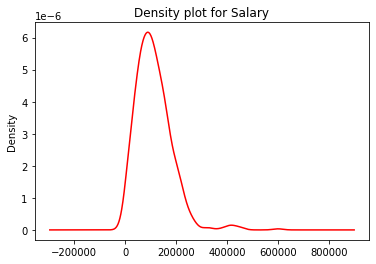

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# reading the database
data = pd.read_csv("ds_salaries.csv")
data.salary_in_usd.plot.density(color='red')
plt.title('Density plot for Salary')
plt.show()

**Line plot**

**Line plot for employment_type and salary**

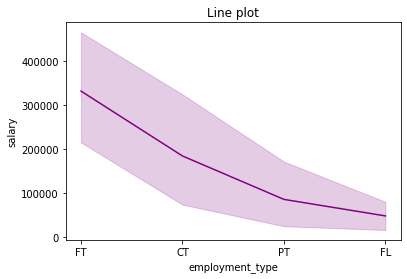

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# reading the database
data = pd.read_csv("ds_salaries.csv")
sns.lineplot(x='employment_type', y='salary', data=data,color="purple")
plt.title("Line plot")
plt.show()

**Scattet plot**

**scatter plot for employment_type and salary_in_usd**

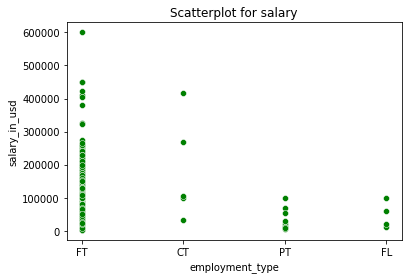

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# reading the database
data = pd.read_csv("ds_salaries.csv")
sns.scatterplot(x='employment_type', y='salary_in_usd',data=data,color="green")
plt.title("Scatterplot for salary")
plt.show()

**Heatmap Representation**

**Correlation between all the attributes present in the dataset**

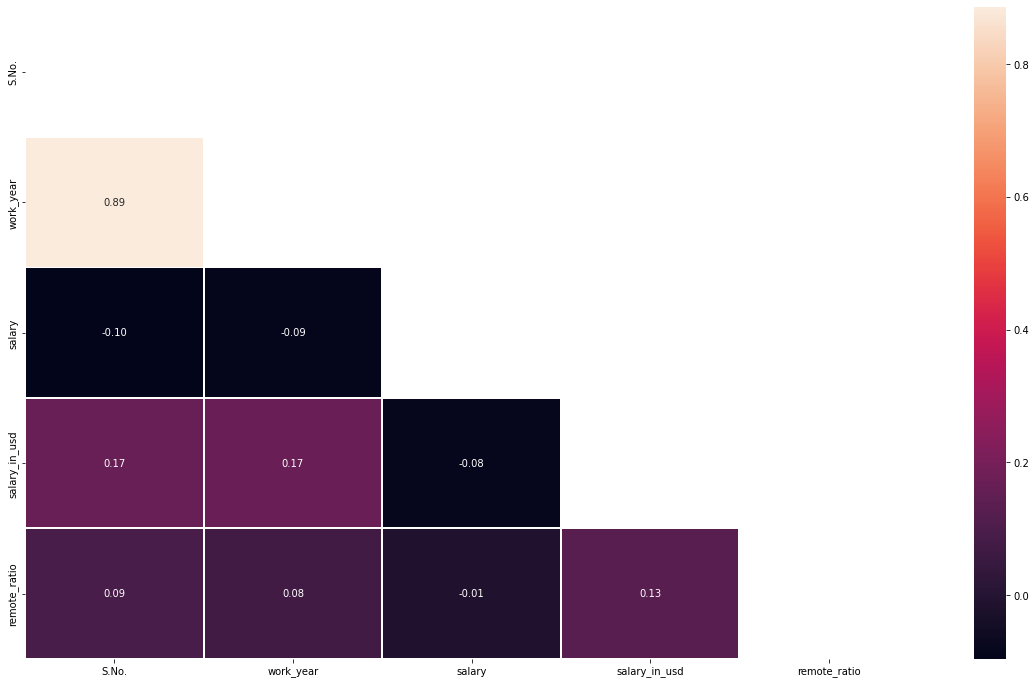

In [ ]:
plt.figure(figsize = (20, 12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

**Plotting all the roles in Data Science field using bar plot**

In [ ]:
import plotly.express as px
z=data['job_title'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Roles in Data  Science')
fig.show()

**Displaying top 10 popular jobs in data science field using bar garph**

In [ ]:
import plotly.express as px
z=data['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='seaborn',title='<b> Top 10 Popular Roles in Data Sceince')
fig.show()

**Displaying top 10 highest paid roles in data science using bar graph**

In [ ]:
fig=px.bar(data.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},template='ggplot2',text='salary_in_usd',title='<b> Top 10 Highest Paid Roles in Data Science')
fig.show()

**Companies count in different locaions**

In [ ]:
data['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

**Encoding the data present in the dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
category=['employment_type','experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
for i in category:
  label=le.fit_transform(data[i])
  data.drop(i,axis=1,inplace=True)
  data[i]=label

**displaying dataset**

In [ ]:
data

,S.No.,work_year,salary,salary_in_usd,remote_ratio,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,1,2020,70000,79833,0,2,2,22,7,14,12,0
1,2,2020,260000,260000,0,3,2,41,16,32,29,2
2,3,2020,85000,109024,50,3,2,7,8,20,18,1
3,4,2020,20000,20000,0,2,2,47,16,23,20,2
4,5,2020,150000,150000,50,3,2,38,16,55,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,603,2022,154000,154000,100,3,2,17,16,55,48,1
603,604,2022,126000,126000,100,3,2,17,16,55,48,1
604,605,2022,129000,129000,0,3,2,12,16,55,48,1
605,606,2022,150000,150000,100,3,2,12,16,55,48,1


**Classification ALgorithms**

**Random Forest Classification**

In [ ]:
X = data[['work_year','salary','job_title']]
y = data['company_size']
# splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11,max_features='auto',min_samples_leaf=2,min_samples_split=3,n_estimators=130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

Accuracy score

In [ ]:
y_pred = rand_clf.predict(X_test)
# accuracy score
print(accuracy_score(y_train, rand_clf.predict(X_train)))
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.8561320754716981
0.6830601092896175


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[38 22  1]
 [12 81  0]
 [14  9  6]]


Classification report for Random forest algorithm

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        61
           1       0.72      0.87      0.79        93
           2       0.86      0.21      0.33        29

    accuracy                           0.68       183
   macro avg       0.72      0.57      0.58       183
weighted avg       0.70      0.68      0.66       183



**K Nearest Neighbor algorithm**

In [ ]:
X = data[['work_year','salary','job_title']]
y = data['company_size']
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy score

In [ ]:
y_pred = knn.predict(X_test)
# accuracy score
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.6556603773584906
0.4808743169398907


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[22 39  0]
 [27 65  1]
 [ 9 19  1]]


classification report for K Nearest neighbor algorithm

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.36      0.37        61
           1       0.53      0.70      0.60        93
           2       0.50      0.03      0.06        29

    accuracy                           0.48       183
   macro avg       0.47      0.36      0.35       183
weighted avg       0.47      0.48      0.44       183



**Support Vector Machine algorithm**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
'gamma' : [0.0001, 0.001, 0.01, 0.1],
'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid_search.best_params_
{'C': 10, 'gamma': 0.1}
# best accuracy
grid_search.best_score_

0.5519047619047619

In [ ]:
svc = SVC(C = 10, gamma = 0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

Accuracy score

In [ ]:
y_pred = svc.predict(X_test)
# accuracy score
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9198113207547169
0.4918032786885246


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[13 46  2]
 [12 76  5]
 [ 4 24  1]]


Classification report for support vector machine

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.21      0.29        61
           1       0.52      0.82      0.64        93
           2       0.12      0.03      0.05        29

    accuracy                           0.49       183
   macro avg       0.36      0.35      0.33       183
weighted avg       0.43      0.49      0.43       183

